<a href="https://colab.research.google.com/github/aldoserrano/DataScienceCourse/blob/main/ProyectoIntegradoModulo_IntroToDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 28.1 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=dacce0fe4859322c548dbde99da56af2f06e4bd0508f41ecdb0ffb80838fc0cd
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry


In [38]:
import numpy as np 
import pandas as pd 
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py

import pycountry 
import folium 
from folium import plugins


import numpy as np
from PIL import Image


import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os

# Importamos el dataset

In [141]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceCourse/ProyectoInt1_IntroAlaCD/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [49]:
# Creating a copy of the original dataframe- df
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,Tiger Woods,USA,8,11,Golf,2020,62.3
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [50]:
# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


In [51]:
#3. Los atletas mejor pagados en 2020

In [55]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#4. Análisis de los atletas mejor pagados entre 1990 y 2020.

In [57]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient(cmap='Reds')

,Name,Sport,earnings ($ million),Nationality
year,,,,
2020,Roger Federer,TENNIS,106.300000,Switzerland
2019,Lionel Messi,SOCCER,127.000000,Argentina
2018,Floyd Mayweather,BOXING,285.000000,USA
2017,Cristiano Ronaldo,SOCCER,93.000000,Portugal
2016,Cristiano Ronaldo,SOCCER,88.000000,Portugal
2015,Floyd Mayweather,BOXING,300.000000,USA
2014,Floyd Mayweather,BOXING,105.000000,USA
2013,Tiger Woods,GOLF,78.100000,USA
2012,Floyd Mayweather,BOXING,85.000000,USA


In [64]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='blue',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [67]:
# Top Paid Athlete for Each Year
from plotly import tools


total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

In [68]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [69]:
trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

##5. Análisis de los 10 atletas mejores pagados cada año entre 1990 y 2020.


In [70]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [71]:
max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [74]:
s = df['Name'].value_counts().to_frame()[:10]
s.style.background_gradient(cmap='Reds')  

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13
Roger Federer,12
Phil Mickelson,11
Cristiano Ronaldo,10
Shaquille O'Neal,9
Lionel Messi,9


##6. ¿Dónde se encuentran las mujeres?

In [75]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
29,30,Monica Seles,USA,10,12,TENNIS,1992,8.500000


##7. Analizando a los 3 mejores pagados de todos los tiempos.

In [76]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds') 

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000



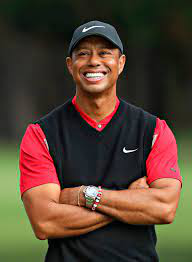

In [79]:
def earnings_plot(dataframe,athlete,image_path,opacity):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          opacity= opacity,
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

image_path = "/content/drive/MyDrive/DataScienceCourse/ProyectoInt1_IntroAlaCD/descarga.jfif"
earnings_plot(df1,'Tiger Woods',image_path,opacity=0.3)


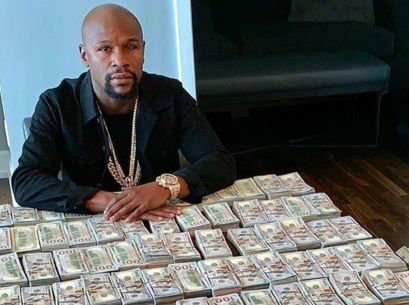

In [83]:
image_path = "/content/drive/MyDrive/DataScienceCourse/ProyectoInt1_IntroAlaCD/floyd-mayweather-fortuna.jpg_1901870453.jpg"
earnings_plot(df1,'Floyd Mayweather',image_path,opacity=0.2)


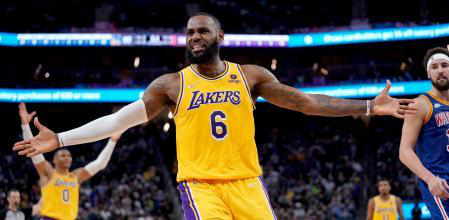

In [84]:
image_path = "/content/drive/MyDrive/DataScienceCourse/ProyectoInt1_IntroAlaCD/6208ce08ba65b.r_d.3000-2000-748.jpeg"
earnings_plot(df1,'LeBron James',image_path,opacity=0.2)


## CHALLENGES

*texto en cursiva*

# Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.


In [142]:
 #= df[df['Current Rank'] == 1].value_counts().to_frame()
Deps_2010_2020 = df[df['Year'] >= 2010]
Deps_2010_2020

# Deps_2010_2020.dtypes 

#df['Year'].dtypes
#Deps_2010_2020 = df['Name'].value_counts().to_frame()[:10]
#Deps_2010_2020


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
191,192,Tiger Woods,USA,1,1,golf,2010,105.0
192,193,Floyd Mayweather,USA,2,>10,boxing,2010,65.0
193,194,Kobe Bryant,USA,3,2,basketball,2010,48.0
194,195,Phil Mickelson,USA,4,6,golf,2010,46.0
195,196,David Beckham,UK,5,5,soccer,2010,43.7
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [143]:

Deps_2010_2020.dropna(subset=['Previous Year Rank'],inplace=True)
Deps_2010_2020


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
191,192,Tiger Woods,USA,1,1,golf,2010,105.0
192,193,Floyd Mayweather,USA,2,>10,boxing,2010,65.0
193,194,Kobe Bryant,USA,3,2,basketball,2010,48.0
194,195,Phil Mickelson,USA,4,6,golf,2010,46.0
195,196,David Beckham,UK,5,5,soccer,2010,43.7
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [150]:
# Deps_2010_2020[Deps_2010_2020['Current Rank'] <= Deps_2010_2020['Previous Year Rank']]
Deps_2010_2020['Previous Year Rank'] = Deps_2010_2020['Previous Year Rank'].str.strip('?')
Deps_2010_2020['Previous Year Rank'] = Deps_2010_2020['Previous Year Rank'].str.strip('>')
Deps_2010_2020.dtypes
# fifa[‘Wage’].str.strip(‘€K’)

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [156]:
Deps_2010_2020.astype({'Previous Year Rank': 'int64'}).dtypes
# df.astype({'col1': 'int32'}).dtypes
# Deps_2010_2020

ValueError: ignored

In [121]:
# Atleta con el menor número de apariciones y mayores ganancias.

